WEEK-14, ASS NO-09

Q1. What is the purpose of grid search cv in machine learning, and how does it work?

Grid Search Cross-Validation (Grid Search CV) is a technique used in machine learning to optimize hyperparameters of a model, thereby enhancing its performance. Here’s a breakdown of its purpose and how it works:

### Purpose of Grid Search CV

1. **Hyperparameter Optimization**: 
   - Machine learning models often have hyperparameters (parameters not learned from the data during training) that need to be set before training. Grid search helps in systematically finding the best combination of these hyperparameters.

2. **Model Performance Improvement**: 
   - By identifying the optimal hyperparameters, grid search can improve the model’s performance, leading to better predictions and generalization to unseen data.

3. **Systematic Exploration**: 
   - Instead of relying on intuition or trial-and-error methods, grid search provides a structured approach to explore combinations of hyperparameters.

4. **Validation**: 
   - Grid search uses cross-validation, which allows for a more reliable estimate of the model's performance by reducing the variance associated with a single train-test split.

### How Grid Search CV Works

1. **Define Hyperparameter Space**: 
   - Specify the hyperparameters to tune and their possible values. For example:
     - For a support vector machine, you might tune `C` (regularization parameter) and `kernel` (type of kernel function).
     - For a decision tree, you might tune `max_depth`, `min_samples_split`, and `criterion`.

2. **Create the Parameter Grid**: 
   - Construct a grid of hyperparameter combinations. Each combination represents a unique set of hyperparameters to evaluate.

3. **Cross-Validation Setup**: 
   - For each combination in the grid, use cross-validation to assess the model's performance. The data is split into training and validation sets multiple times (e.g., k-fold cross-validation).

4. **Model Training and Evaluation**:
   - Train the model with each hyperparameter combination using the training set and evaluate its performance on the validation set.
   - Store the evaluation metric (e.g., accuracy, F1 score, mean squared error) for each combination.

5. **Select Best Hyperparameters**: 
   - After evaluating all combinations, select the hyperparameters that resulted in the best average performance across the cross-validation folds.

6. **Final Model Training**: 
   - Train the final model using the entire dataset and the selected best hyperparameters to make predictions on unseen data.

### Example Workflow

Here’s a simple example of using grid search CV with a support vector machine:

1. **Define Hyperparameter Grid**:
   ```python
   param_grid = {
       'C': [0.1, 1, 10],
       'kernel': ['linear', 'rbf'],
   }
   ```

2. **Set Up Grid Search CV**:
   ```python
   from sklearn.model_selection import GridSearchCV
   from sklearn.svm import SVC

   model = SVC()
   grid_search = GridSearchCV(model, param_grid, cv=5)
   ```

3. **Fit the Grid Search**:
   ```python
   grid_search.fit(X_train, y_train)
   ```

4. **Retrieve Best Hyperparameters**:
   ```python
   best_params = grid_search.best_params_
   ```

5. **Train Final Model**:
   ```python
   best_model = grid_search.best_estimator_
   best_model.fit(X_train, y_train)
   ```

 

Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose
one over the other?

Grid Search Cross-Validation (Grid Search CV) and Randomized Search Cross-Validation (Randomized Search CV) are both techniques used for hyperparameter optimization in machine learning models. While they serve the same purpose, they differ in their approach to searching for the best hyperparameters. Here’s a detailed comparison of the two methods:

### 1. **Grid Search CV**
- **Definition**: Grid Search CV exhaustively searches through a specified subset of hyperparameters by evaluating all possible combinations.
- **How It Works**:
  - You define a grid of hyperparameters with specific values (e.g., `{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}`).
  - The search evaluates every combination of these hyperparameters using cross-validation.
  
- **Advantages**:
  - **Comprehensive**: Since it evaluates all combinations, it ensures that the best set of hyperparameters is found within the defined grid.
  - **Deterministic**: The results are consistent, as the same parameter values will always yield the same performance metrics.

- **Disadvantages**:
  - **Computationally Expensive**: The number of evaluations grows exponentially with the number of hyperparameters and their values. This can lead to long computation times, especially with a large search space.
  - **Not Scalable**: For high-dimensional parameter spaces or large datasets, grid search can become impractical.

### 2. **Randomized Search CV**
- **Definition**: Randomized Search CV samples a specified number of parameter settings from a given hyperparameter distribution rather than evaluating every combination.
- **How It Works**:
  - You define a distribution for each hyperparameter (e.g., `{'C': uniform(0.1, 10), 'kernel': ['linear', 'rbf']}`).
  - Random combinations of hyperparameters are sampled and evaluated using cross-validation for a fixed number of iterations.

- **Advantages**:
  - **Faster**: Since it only evaluates a fixed number of random combinations, it is often much quicker than grid search, particularly in high-dimensional spaces.
  - **Broader Exploration**: Randomized search can potentially explore a wider range of values and settings, which may lead to finding a better-performing model.
  - **Less Prone to Local Optima**: It may discover configurations that grid search might miss due to its exhaustive nature.

- **Disadvantages**:
  - **Less Comprehensive**: There’s no guarantee that the best hyperparameter set will be found, as it’s based on random sampling.
  - **Results May Vary**: Different runs may yield different results, as the search is random.

### When to Choose One Over the Other

- **Choose Grid Search CV When**:
  - You have a small number of hyperparameters with a limited number of values, making it feasible to evaluate all combinations.
  - You need a thorough and deterministic search in a well-defined parameter space where you want to ensure finding the optimal parameters.
  - The computational cost is not a significant concern.

- **Choose Randomized Search CV When**:
  - You have a large hyperparameter space with many parameters or continuous variables, making a complete search impractical.
  - You are working with limited computational resources or time and need quicker results.
  - You want to explore a wider range of hyperparameter values, especially when you are unsure of which parameters will have the most significant impact on model performance.
  - You are willing to accept some randomness in the search process for potentially broader exploration.

### Example Use Cases
- **Grid Search CV**: Fine-tuning a small number of hyperparameters for models like linear regression or small neural networks where the search space is manageable.
- **Randomized Search CV**: Tuning a complex model like a deep neural network or a random forest with many hyperparameters, where a quick search can provide good results without exhaustively evaluating every combination.

 

Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

Data leakage is a critical issue in machine learning that occurs when information from outside the training dataset is used to create the model. This can lead to overly optimistic performance metrics and poor generalization to new, unseen data. Here's a detailed explanation of data leakage, its implications, and an illustrative example:

### What is Data Leakage?

**Data leakage** refers to the situation where the model inadvertently gains access to information that it should not have during the training phase. This can happen in several ways, such as:

- **Training on future data**: When the model is trained on data that includes future information about the target variable.
- **Feature leakage**: When the features used to train the model contain information derived from the target variable or from data that will not be available in a real-world scenario.
- **Data split issues**: When the train-test split does not properly separate the data, allowing the model to learn from the test set.

### Why is Data Leakage a Problem?

1. **Overfitting**: The model may perform exceptionally well on the training data (and even on the test data if leakage occurs), as it has been exposed to information it should not have seen. However, it is likely to perform poorly on new, unseen data.
  
2. **Misleading Metrics**: Leakage leads to inflated performance metrics, such as accuracy, precision, or recall, giving a false impression of the model's effectiveness.

3. **Poor Generalization**: The ultimate goal of machine learning is to create models that generalize well to new data. Data leakage undermines this goal, as the model may not perform as expected in real-world scenarios.

### Example of Data Leakage

**Scenario**: Imagine you're building a predictive model to forecast whether a customer will buy a product based on their browsing history and past purchase data.

- **Data Leakage Example**: Suppose you include a feature that indicates the total amount spent by a customer in the past month. If this feature is calculated from the same dataset that includes the target variable (whether they bought the product or not), it could lead to leakage.
  - In this case, the total amount spent may be influenced by the customer's current purchasing decision (the target variable). If customers who are likely to buy spend more, this feature directly correlates with the target variable and can bias the model's learning.

**Consequences**: When you evaluate this model on the test dataset, the model may show high accuracy due to the leakage, but when applied in a real-world setting, it will likely perform poorly because it relies on information that is not available when making predictions.

### How to Prevent Data Leakage

1. **Proper Data Splitting**: Always ensure that the data is split into training, validation, and test sets before performing any analysis or feature engineering. The model should only have access to the training data during the fitting process.

2. **Feature Engineering**: Be cautious when creating features. Ensure that they do not include any information derived from the target variable or any future information that wouldn't be available at prediction time.

3. **Cross-Validation**: Use techniques like cross-validation that ensure the model is evaluated on data it hasn’t seen during training.

4. **Monitoring**: Continuously monitor model performance on new, unseen data to catch potential issues with overfitting or leakage.

 

Q4. How can you prevent data leakage when building a machine learning model?

Preventing data leakage is essential for building reliable and robust machine learning models. Here are several strategies to help mitigate the risk of data leakage during the model development process:

### 1. **Proper Data Splitting**
   - **Train-Test Split**: Ensure that your dataset is split into distinct training, validation, and test sets before any modeling or feature engineering is performed. The model should only have access to the training data when fitting.
   - **Stratified Splitting**: For classification tasks, use stratified sampling to maintain the same class distribution across train and test sets, which helps in preventing leakage from the minority class.

### 2. **Feature Engineering**
   - **Create Features After Splitting**: Generate new features based only on the training data. Avoid using any information from the validation or test sets when creating features.
   - **Time-Based Features**: If the data is time-series, ensure that features are derived from past data only, preventing future information from influencing predictions.

### 3. **Cross-Validation Techniques**
   - **K-Fold Cross-Validation**: Use k-fold cross-validation to ensure that your model is trained and validated on different subsets of data, which helps identify leakage.
   - **Time Series Split**: For time-series data, utilize time series-specific cross-validation techniques (e.g., TimeSeriesSplit) that respect the temporal order of observations.

### 4. **Be Cautious with Data Sources**
   - **Avoid Mixing Data Sources**: Ensure that data used for training and validation comes from the same distribution and is collected in the same way. Mixing datasets from different sources can introduce leakage.
   - **Monitor Data Changes**: Be aware of how data evolves over time. If the model is trained on historical data and used in a different context, it may lead to leakage.

### 5. **Use of Validation Sets**
   - **Hold-Out Validation Set**: Create a separate validation set from the training data to tune hyperparameters. This set should not be touched until the final model is trained.
   - **Final Test Set**: Use a completely separate test set to evaluate the final model’s performance to ensure it has never been exposed to this data during training or validation.

### 6. **Feature Selection Techniques**
   - **Univariate Feature Selection**: Use techniques like univariate statistical tests to select features based on their relationship with the target variable, ensuring they do not include leaked information.
   - **Recursive Feature Elimination (RFE)**: This method removes features recursively, using the model to evaluate the importance of each feature while preventing leakage by operating only on the training set.

### 7. **Pipeline Management**
   - **Use Pipelines**: Implement machine learning pipelines (e.g., with scikit-learn's `Pipeline`) that bundle preprocessing steps and model training. This ensures that all transformations (e.g., scaling, encoding) are applied only to the training data and then consistently to the test data.
   - **Fit and Transform Separately**: Fit transformers (e.g., scalers, encoders) only on the training data and then apply them to both the training and test sets.

### 8. **Monitoring and Validation**
   - **Evaluate Model Performance**: Continuously monitor the model's performance on unseen data. Sudden drops in performance may indicate potential data leakage.
   - **Model Explainability**: Use model interpretability techniques (like SHAP or LIME) to ensure that the features used by the model make logical sense and do not indicate leakage.

### 9. **Document Your Process**
   - **Maintain Clear Documentation**: Document the data preparation, feature engineering, and model evaluation processes. This can help identify areas where leakage might occur and facilitate reviews by team members.



Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

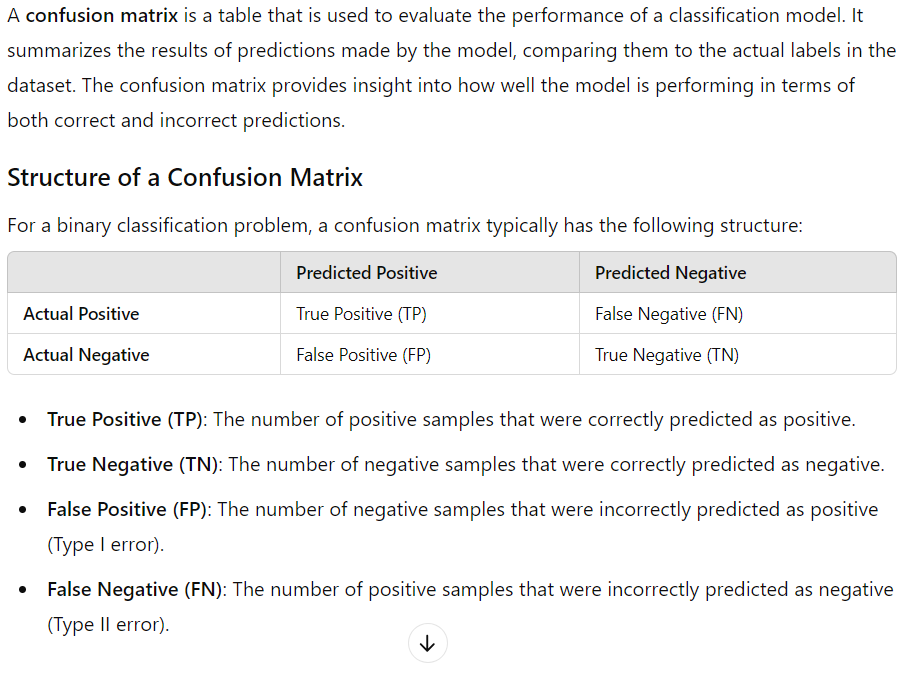

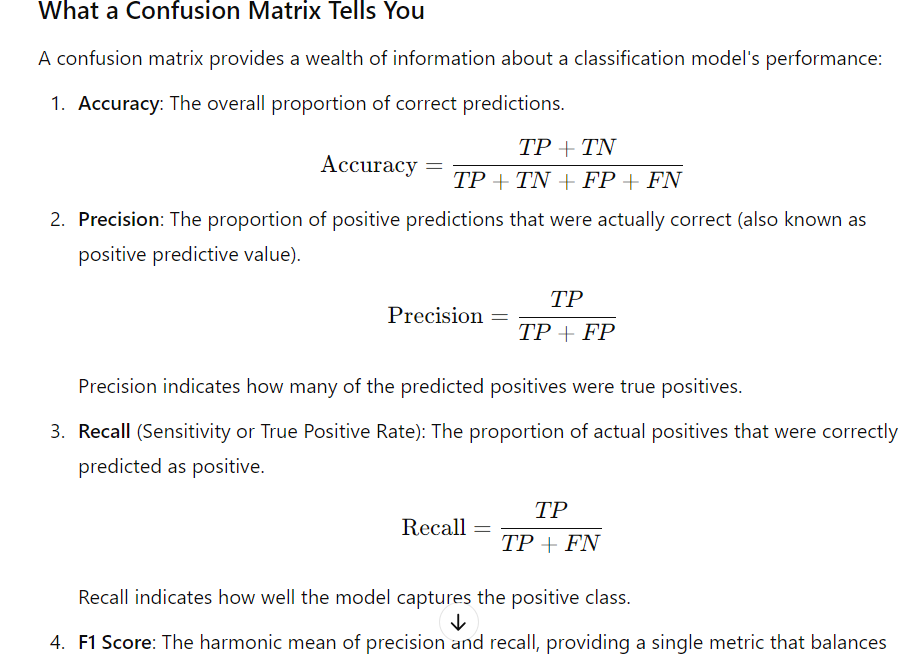

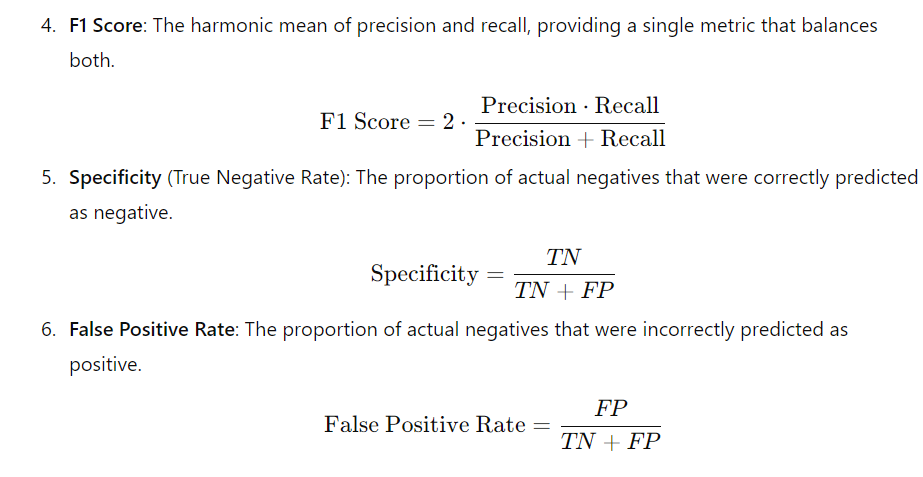

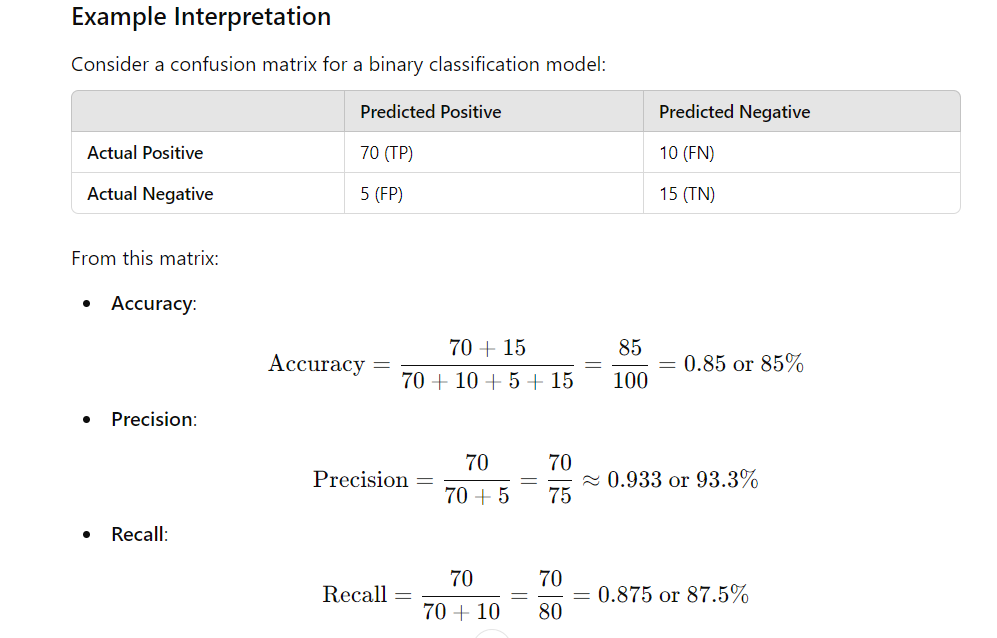

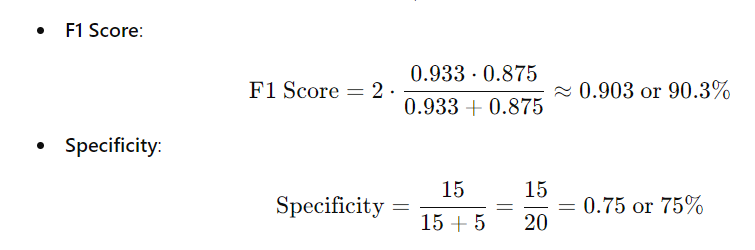

Q6. Explain the difference between precision and recall in the context of a confusion matrix.

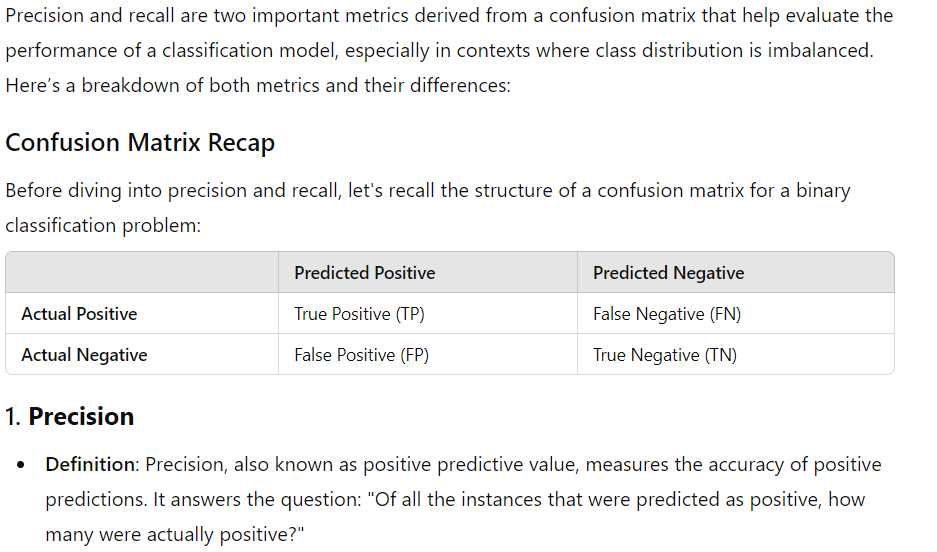

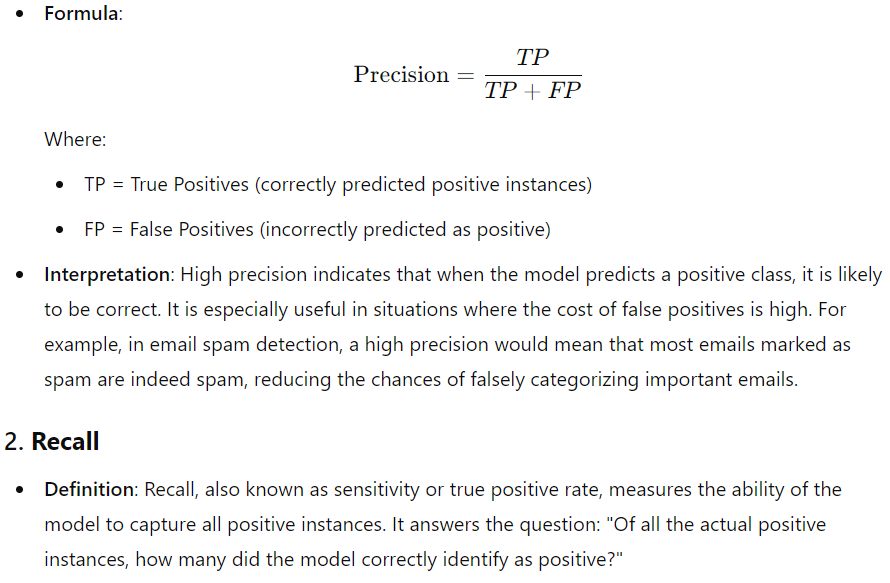

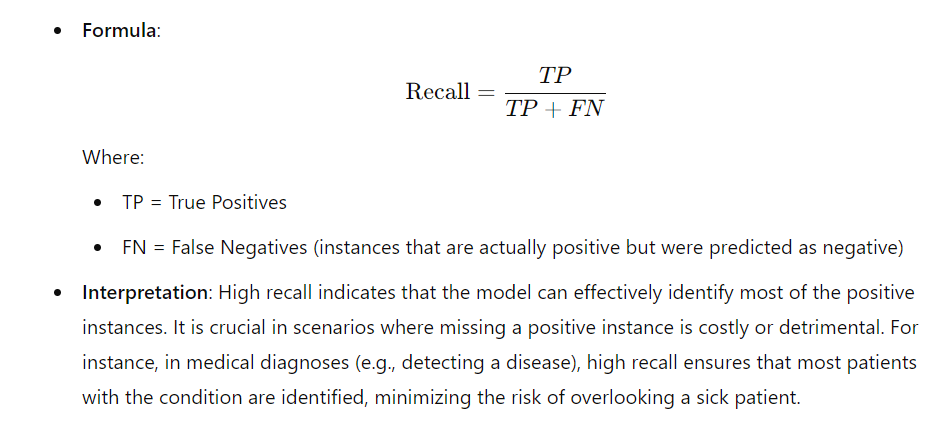

 
 

### Key Differences

| Aspect                   | Precision                           | Recall                              |
|--------------------------|-------------------------------------|-------------------------------------|
| **Focus**                | Accuracy of positive predictions     | Ability to capture all actual positives |
| **Formula**              | \(\frac{TP}{TP + FP}\)              | \(\frac{TP}{TP + FN}\)              |
| **Context**              | Useful when false positives are costly | Useful when false negatives are costly |
| **Trade-off**            | High precision often leads to lower recall and vice versa; optimizing one can compromise the other. | High recall may lead to lower precision; focusing on capturing more positives may include more false positives. |

### Balancing Precision and Recall

In practice, there is often a trade-off between precision and recall. A model that achieves high precision might miss some positive instances (lower recall), while a model that captures more positives may introduce more false positives (lower precision). 

### F1 Score

To balance the trade-off between precision and recall, the **F1 Score** can be used. The F1 Score is the harmonic mean of precision and recall and is particularly useful when you need a single metric to assess model performance in scenarios where class imbalance exists:

\[
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
\]

 

Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

Interpreting a confusion matrix is crucial for understanding the types of errors made by a classification model. By analyzing the values within the matrix, you can gain insights into specific areas where the model performs well and where it may be struggling. Here’s how to interpret a confusion matrix to assess the errors made by your model:

### Structure of a Confusion Matrix

For a binary classification problem, a confusion matrix looks like this:

|                  | Predicted Positive | Predicted Negative |
|------------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)   | False Negative (FN)   |
| **Actual Negative** | False Positive (FP)  | True Negative (TN)     |

### Types of Errors

From the confusion matrix, you can identify the following types of errors:

1. **False Positives (FP)**:
   - **Definition**: These are instances that are actually negative but are incorrectly predicted as positive.
   - **Interpretation**: A high number of false positives can indicate that the model is overly aggressive in predicting the positive class. This could lead to situations where negative instances are mistakenly labeled as positive.
   - **Example**: In a spam detection model, a false positive would be a legitimate email marked as spam. This can result in important messages being missed.

2. **False Negatives (FN)**:
   - **Definition**: These are instances that are actually positive but are incorrectly predicted as negative.
   - **Interpretation**: A high number of false negatives indicates that the model is missing positive cases, which could be critical depending on the application. This is particularly concerning when the cost of missing a positive instance is high.
   - **Example**: In medical diagnosis, a false negative would be a sick patient who is incorrectly classified as healthy. This can have serious consequences, such as delayed treatment.

### Analyzing Model Performance

1. **Class Imbalance**:
   - Examine the distribution of TP, TN, FP, and FN to understand if the model is biased towards one class. If there are many more negatives than positives (or vice versa), the model may perform well on the majority class while failing on the minority class.

2. **Precision and Recall**:
   - Calculate precision and recall based on the confusion matrix:
     - **Precision** focuses on the accuracy of positive predictions (low precision indicates many false positives).
     - **Recall** focuses on capturing all actual positives (low recall indicates many false negatives).
   - Analyzing these metrics helps you understand the trade-offs between them.

3. **Error Patterns**:
   - Identify any patterns in the types of errors made:
     - If your model frequently misclassifies a certain class (e.g., many false negatives), consider exploring additional features, rebalancing the dataset, or using different algorithms better suited for that class.
     - Visualizing the data or using feature importance techniques may help identify underlying reasons for specific misclassifications.

4. **Use Cases**:
   - Determine the context of the problem:
     - In some applications, false positives may be more tolerable (e.g., spam detection), while in others, false negatives may be unacceptable (e.g., fraud detection).
     - Tailor your model evaluation based on the consequences of each type of error to prioritize precision or recall as needed.

### Example Interpretation

Consider the following confusion matrix:

|                  | Predicted Positive | Predicted Negative |
|------------------|--------------------|--------------------|
| **Actual Positive** | 50 (TP)            | 10 (FN)            |
| **Actual Negative** | 5 (FP)             | 35 (TN)            |

From this matrix:
- **True Positives (TP)**: 50 instances correctly predicted as positive.
- **False Negatives (FN)**: 10 instances incorrectly predicted as negative (missed positives).
- **False Positives (FP)**: 5 instances incorrectly predicted as positive (wrongly classified negatives).
- **True Negatives (TN)**: 35 instances correctly predicted as negative.

 

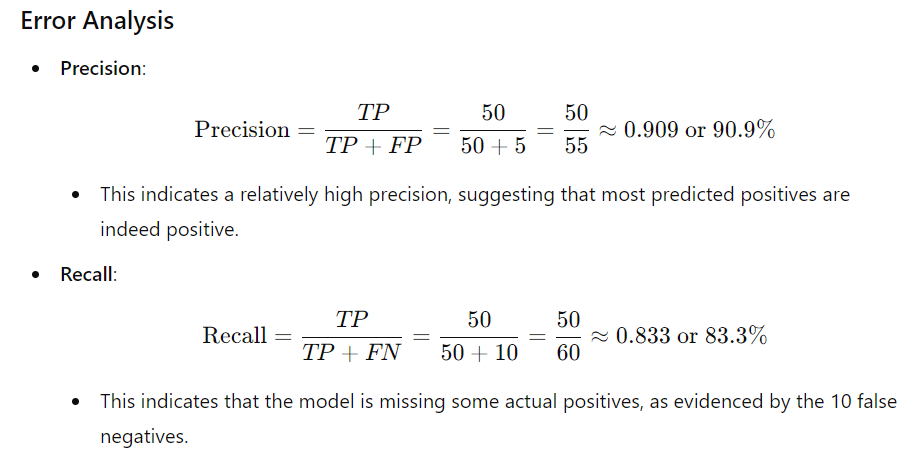

Q8. What are some common metrics that can be derived from a confusion matrix, and how are they
calculated?

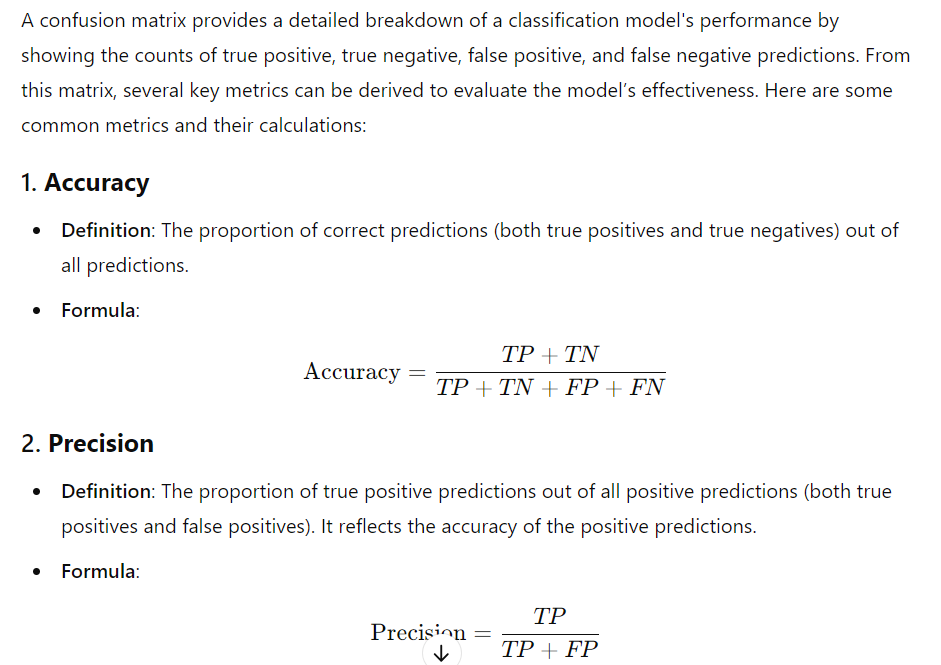

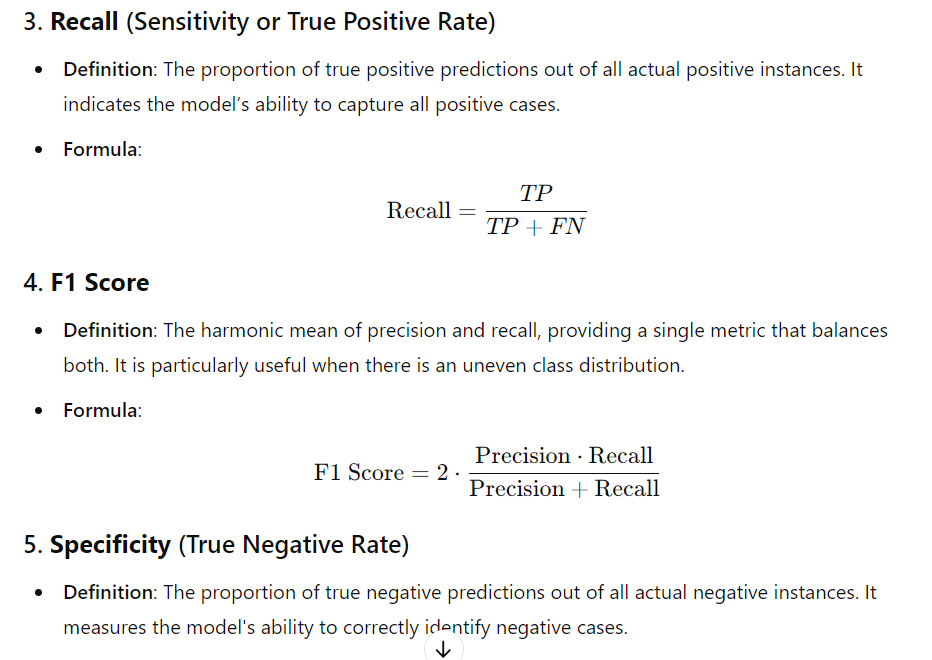

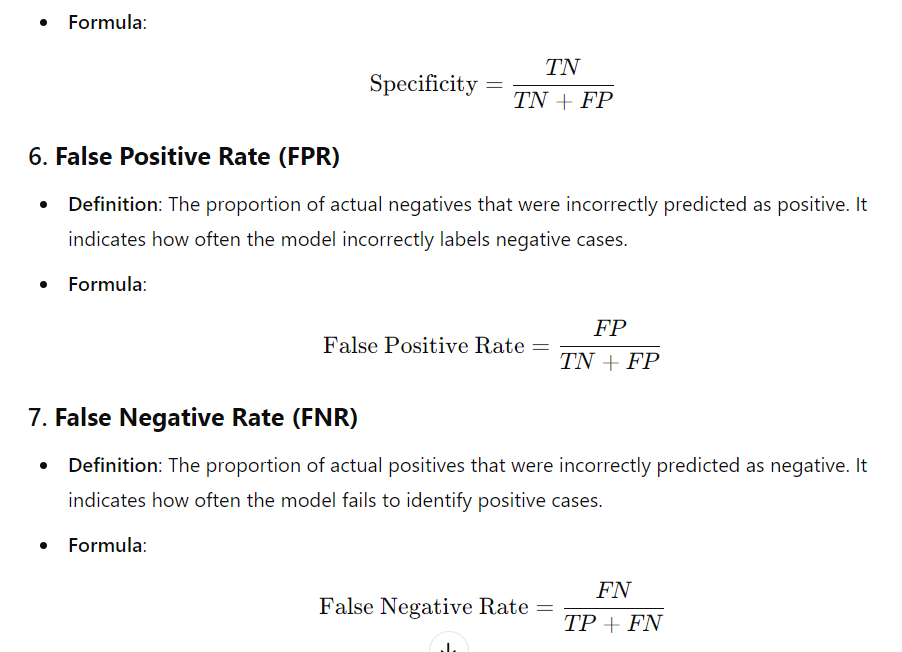

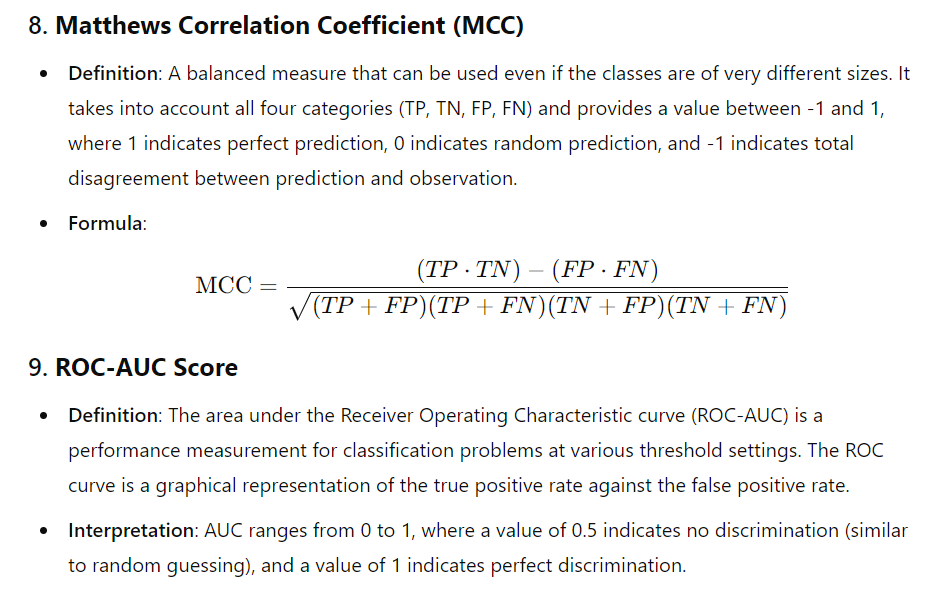

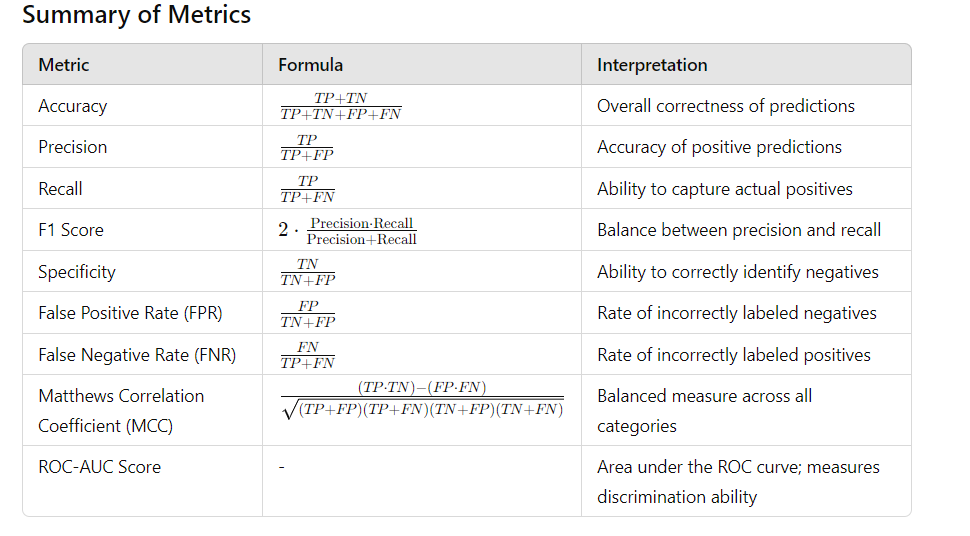

Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

The accuracy of a classification model is directly related to the values in its confusion matrix. The confusion matrix provides a detailed breakdown of how the model's predictions compare to the actual class labels, which is essential for calculating accuracy. Here’s how the two are connected:

### Components of the Confusion Matrix

For a binary classification problem, a confusion matrix has the following structure:

|                  | Predicted Positive | Predicted Negative |
|------------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)   | False Negative (FN)   |
| **Actual Negative** | False Positive (FP)  | True Negative (TN)     |

### Calculating Accuracy

**Accuracy** is defined as the proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model. The formula for accuracy is:

 ACUURACY=(TP+TN)/TP+TN+FP+FN
### Relationship Between Accuracy and Confusion Matrix Values

1. **Correct Predictions**: The numerator of the accuracy formula consists of **True Positives (TP)** and **True Negatives (TN)**. These values represent the instances where the model correctly predicted the class labels.
   - **TP**: The number of positive instances correctly classified as positive.
   - **TN**: The number of negative instances correctly classified as negative.

2. **Total Predictions**: The denominator of the accuracy formula includes all four categories (TP, TN, FP, FN), representing all instances in the dataset. This means that accuracy takes into account both correct and incorrect predictions.

3. **Effect of False Positives and False Negatives**: 
   - **False Positives (FP)**: These represent negative instances that were incorrectly predicted as positive. An increase in FP decreases accuracy, as they contribute to incorrect predictions.
   - **False Negatives (FN)**: These represent positive instances that were incorrectly predicted as negative. An increase in FN also decreases accuracy for the same reason.

### Implications

1. **High Accuracy**: A high accuracy indicates that the model correctly classifies a large proportion of instances. This can result from a high number of TP and TN compared to FP and FN.

2. **Low Accuracy**: Low accuracy indicates that the model misclassifies many instances, with higher counts of FP and FN. It suggests that the model may not be effectively distinguishing between the classes.

3. **Class Imbalance**: In scenarios with imbalanced classes (e.g., one class significantly outnumbering the other), accuracy can be misleading. A model could achieve high accuracy by simply predicting the majority class most of the time, while performing poorly on the minority class. In such cases, metrics like precision, recall, and F1 score may provide a better evaluation of model performance.

### Example

Consider the following confusion matrix:

|                  | Predicted Positive | Predicted Negative |
|------------------|--------------------|--------------------|
| **Actual Positive** | 70 (TP)             | 10 (FN)             |
| **Actual Negative** | 5 (FP)              | 15 (TN)             |

**Calculating Accuracy**:

- TP = 70
- TN = 15
- FP = 5
- FN = 10

  

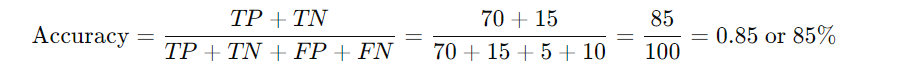

Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning
model?

A confusion matrix is a powerful tool for diagnosing potential biases and limitations in a machine learning model. By analyzing the values within the confusion matrix, you can gain insights into how well the model performs across different classes and identify areas where the model may be making systematic errors. Here’s how to use a confusion matrix for this purpose:

### 1. **Identify Class-Specific Performance**

- **True Positives (TP) and True Negatives (TN)**: Assess how many instances of each class are correctly classified. High TP for a specific class indicates good model performance for that class.
- **False Positives (FP) and False Negatives (FN)**: Examine the counts of FP and FN for each class. A high number of FP means that the model is incorrectly labeling many negative instances as positive, while a high number of FN indicates that many positive instances are being missed.

### 2. **Calculate Class-Specific Metrics**

Using the values in the confusion matrix, calculate metrics such as precision, recall, and F1 score for each class:

- **Precision** for a class helps you understand how many of the predicted positives are truly positive.
- **Recall** indicates how many of the actual positives are captured by the model.
- **F1 Score** provides a balance between precision and recall.

By analyzing these metrics, you can identify which classes the model performs well on and which it struggles with, highlighting potential biases.

### 3. **Examine Imbalance Between Classes**

- **Class Distribution**: Look at the distribution of instances across classes. If one class significantly outnumbers another, the model might be biased toward the majority class. This can lead to:
  - High overall accuracy but poor performance on the minority class.
  - The model predicting the majority class most of the time, neglecting the minority class.

### 4. **Analyze Types of Errors**

- **False Positive Analysis**: If a model frequently misclassifies negative instances as positive (high FP), it might suggest that the model is overly sensitive or lacks features that effectively distinguish between the two classes.
- **False Negative Analysis**: A high FN count indicates that the model is missing positive instances, which might be a concern in applications where failing to identify positives has severe consequences (e.g., medical diagnoses).

### 5. **Investigate Bias in Predictions**

- **Demographic or Feature-Based Analysis**: If the dataset has demographic or feature-related groups, analyze the confusion matrix separately for these groups. For example:
  - If the model performs significantly worse for a specific demographic group, this indicates bias in the model.
  - Evaluating how well the model generalizes across different subsets of the data can reveal whether certain groups are disadvantaged.

### 6. **Evaluate the Effect of Different Thresholds**

- **Adjusting Prediction Thresholds**: By adjusting the classification threshold, you can observe how the confusion matrix changes. This helps understand trade-offs between precision and recall. For example:
  - A lower threshold may increase recall but decrease precision, leading to more false positives.
  - A higher threshold may reduce false positives but increase false negatives.

### 7. **Visualizing the Confusion Matrix**

- **Heatmap Visualization**: Visualizing the confusion matrix as a heatmap can make it easier to identify patterns and areas of concern. Areas with high counts of FP or FN will stand out, helping you quickly spot potential biases or limitations.

  

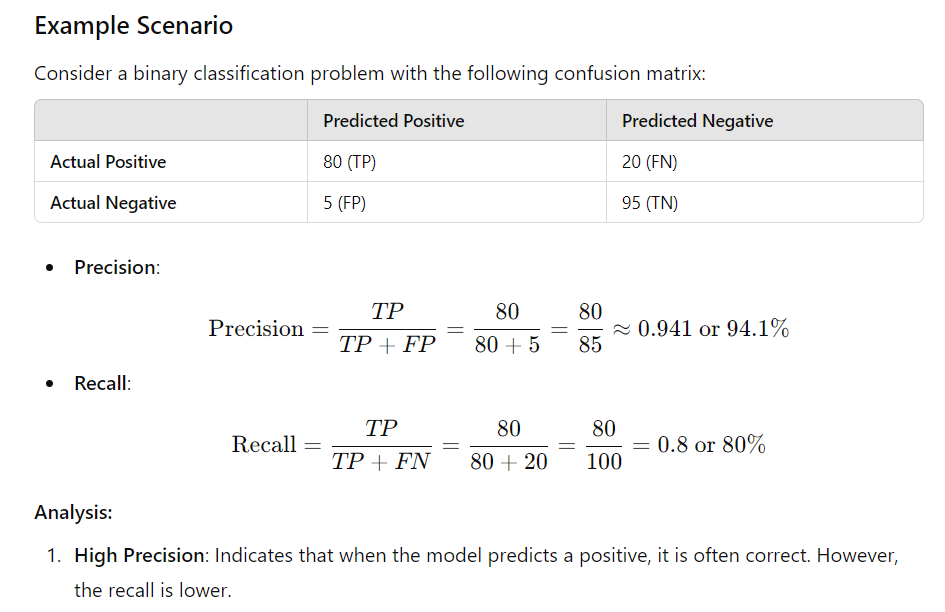

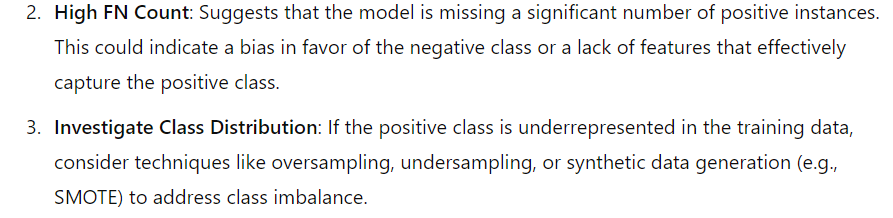